In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Metric: 311 Service Requests by Neighborhood
This dataset records all 311 requests throughout the city of Pittsburgh in all forms, including calls, texts, emails and websites. 311 service requests are non-emergencies that relate to municipal services, for example, grafitti, violations, broken street lights and potholes. These are things that can impact the safety of the neighborhood drastically.

In [18]:
data1 = pd.read_csv("311.csv", index_col = "NEIGHBORHOOD")
data1 = data1.drop(columns = ['STATUS','COUNCIL_DISTRICT','WARD','TRACT','PLI_DIVISION','PUBLIC_WORKS_DIVISION','POLICE_ZONE','FIRE_ZONE'])
data1.head(10)

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,DEPARTMENT,X,Y,GEO_ACCURACY
NEIGHBORHOOD,,,,,,,,
Central Northside,203364.0,2017-12-15T14:53:00,Street Obstruction/Closure,Call Center,DOMI - Permits,-80.016716,40.454144,EXACT
South Side Flats,200800.0,2017-11-29T09:54:00,Graffiti,Control Panel,Police - Zones 1-6,-79.969952,40.429243,APPROXIMATE
Troy Hill,201310.0,2017-12-01T13:23:00,Litter,Call Center,DPW - Street Maintenance,-79.985859,40.459716,EXACT
Banksville,200171.0,2017-11-22T14:54:00,Water Main Break,Call Center,Pittsburgh Water and Sewer Authority,-80.034210,40.406969,EXACT
East Hills,193043.0,2017-10-12T12:46:00,Guide Rail,Call Center,DPW - Construction Division,-79.876582,40.451226,EXACT
East Hills,196521.0,2017-10-31T15:17:00,Guide Rail,Call Center,DPW - Construction Division,-79.876823,40.451165,EXACT
Mount Washington,193206.0,2017-10-13T09:18:00,Sidewalk/Curb/HC Ramp Maintenance,Call Center,DOMI - Permits,-80.012499,40.417230,APPROXIMATE
Bluff,195917.0,2017-10-27T10:23:00,Manhole Cover,Call Center,DOMI - Permits,-79.985586,40.435263,EXACT
Middle Hill,179176.0,2017-08-14T14:00:00,Neighborhood Issues,Control Panel,NaN,-79.977726,40.446142,APPROXIMATE


In [19]:
data1.groupby('NEIGHBORHOOD').count()

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,DEPARTMENT,X,Y,GEO_ACCURACY
NEIGHBORHOOD,,,,,,,,
Allegheny Center,1684,1684,1684,1684,1672,1684,1684,1684
Allegheny West,934,934,934,934,931,934,934,934
Allentown,5128,5128,5128,5128,5091,5128,5128,5128
Arlington,3340,3340,3340,3340,3323,3340,3340,3340
Arlington Heights,87,87,87,87,85,87,87,87
...,...,...,...,...,...,...,...,...
Upper Lawrenceville,4019,4019,4019,4019,3992,4019,4019,4019
West End,1288,1288,1288,1288,1230,1288,1288,1288
West Oakland,2287,2287,2287,2287,2274,2287,2287,2287


In [20]:
data1.groupby(['NEIGHBORHOOD']).size().sort_values(ascending=True)

NEIGHBORHOOD
Mount Oliver Borough       59
Arlington Heights          87
Glen Hazel                291
Northview Heights         421
East Carnegie             425
                        ...  
South Side Flats        13830
South Side Slopes       14775
Squirrel Hill South     15168
Carrick                 17383
Brookline               18345
Length: 91, dtype: int64

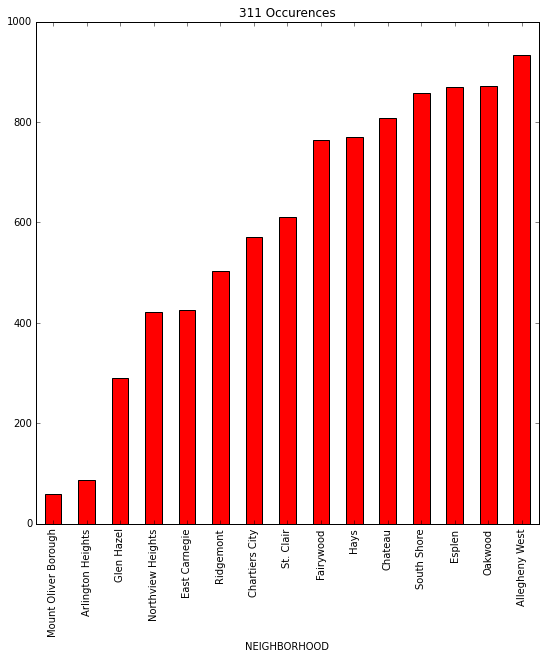

In [21]:
data1.groupby(['NEIGHBORHOOD']).count().nsmallest(15, 'REQUEST_ID', keep='all').plot.bar(y='REQUEST_ID', 
                                                                                        title = '311 Occurences', 
                                                                                        color = 'red',
                                                                                        legend = False,
                                                                                        figsize = (9,9), 
                                                                                        rot = 90, 
                                                                                        use_index = True)

This 311 dataset is a summary of when the complaint was made, what it was about, what platform was used and the place in which the issue was. Most complaints were about potholes, litter, leaks and any debris impacting the community. I used a table with only important how many times a neighborhood was mentioned in the dataset. Mount Oliver only had 56 complaints and Brookline had the most with 18,296 complaints. Using that table, the graph shows the neighborhood with the least amount of complaints on the left and 14 more with increasing values. My dataset shows Mount Oliver to fit the metric of safety best.

# Metric: Fire Incidents by Neighborhood
This dataset records all fire incidents responded to by the Pittsburgh Bureau of Fire. The amount of fire occurences in a neighborhood conributes to its overall safety.

In [22]:
data2 = pd.read_csv("fire_incidents.csv", index_col="neighborhood")
data2

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,,,,
Bloomfield,F130000539,112.0,Fires in structure other than in a building,"4500 BLOCK LIBERTY AVE, PITTSBURGH PA 15216",2013-01-02T23:34:05,1,231EN06,903.0,7.0,8.0,4.200308e+10,2.0,8.0,5.0,3-6,40.462918,-79.951864
Morningside,F130000714,118.0,"Trash or rubbish fire, contained","1200 BLOCK CHISLETT ST, PITTSBURGH PA 15206",2013-01-03T16:36:54,1,231EN07,1014.0,7.0,10.0,4.200310e+10,2.0,10.0,5.0,3-7,40.479532,-79.928185
Shadyside,F130000772,118.0,"Trash or rubbish fire, contained","5800 BLOCK ELLSWORTH AVE, PITTSBURGH PA 15206",2013-01-03T20:54:02,1,231EN08,705.0,8.0,7.0,4.200307e+10,2.0,7.0,4.0,3-11,40.455850,-79.930435
Brighton Heights,F130001276,142.0,Brush or brush-and-grass mixture fire,"1100 BLOCK PEMBERTON ST, PITTSBURGH PA 15212",2013-01-06T00:21:30,0,231EN35,2708.0,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,40.482827,-80.030415
NaN,F130001288,131.0,Passenger vehicle fire,"LOMBARD ST , PITTSBURGH PA 15222",2013-01-06T02:57:42,0,231EN04,305.0,NaN,NaN,NaN,NaN,NaN,NaN,2-1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,F200070433,130.0,"Mobile property (vehicle) fire, Other","2500 BLOCK WADSWORTH ST, PITTSBURGH PA 15213",2020-10-27T18:39:54,0,231EN10,402.0,NaN,NaN,NaN,NaN,NaN,NaN,2-10,NaN,NaN
NaN,F200070681,151.0,"Outside rubbish, trash or waste fire","1500 BLOCK SAW MILL RUN BLVD, PITTSBURGH PA 15210",2020-10-28T18:32:15,0,231EN26,3206.0,NaN,NaN,NaN,NaN,NaN,NaN,4-25,NaN,NaN
Hazelwood,F200071129,113.0,"Cooking fire, confined to container","4400 BLOCK MCCASLIN ST, PITTSBURGH PA 15217",2020-10-30T20:49:05,1,231EN12,1501.0,5.0,15.0,4.200356e+10,3.0,15.0,4.0,2-12,40.419107,-79.938043


In [23]:
data_filtered=data2.dropna()
data_filtered

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,,,,
Bloomfield,F130000539,112.0,Fires in structure other than in a building,"4500 BLOCK LIBERTY AVE, PITTSBURGH PA 15216",2013-01-02T23:34:05,1,231EN06,903.0,7.0,8.0,4.200308e+10,2.0,8.0,5.0,3-6,40.462918,-79.951864
Morningside,F130000714,118.0,"Trash or rubbish fire, contained","1200 BLOCK CHISLETT ST, PITTSBURGH PA 15206",2013-01-03T16:36:54,1,231EN07,1014.0,7.0,10.0,4.200310e+10,2.0,10.0,5.0,3-7,40.479532,-79.928185
Shadyside,F130000772,118.0,"Trash or rubbish fire, contained","5800 BLOCK ELLSWORTH AVE, PITTSBURGH PA 15206",2013-01-03T20:54:02,1,231EN08,705.0,8.0,7.0,4.200307e+10,2.0,7.0,4.0,3-11,40.455850,-79.930435
Brighton Heights,F130001276,142.0,Brush or brush-and-grass mixture fire,"1100 BLOCK PEMBERTON ST, PITTSBURGH PA 15212",2013-01-06T00:21:30,0,231EN35,2708.0,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,40.482827,-80.030415
Central Business District,F130001631,115.0,"Incinerator overload or malfunction, fire conf...","300 BLOCK 3RD AVE, PITTSBURGH PA 15219",2013-01-07T17:16:58,1,231EN04,201.0,6.0,1.0,4.200302e+10,6.0,1.0,2.0,1-4,40.438809,-80.001619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Central Business District,F200069778,113.0,"Cooking fire, confined to container","100 BLOCK SMITHFIELD ST, PITTSBURGH PA 15219",2020-10-24T17:42:02,1,231EN04,201.0,6.0,1.0,4.200302e+10,6.0,1.0,2.0,1-4,40.437304,-80.000224
West Oakland,F200070145,131.0,Passenger vehicle fire,"ROBINSON ST & TERRACE ST, PITTSBURGH PA 15213",2020-10-26T13:51:39,0,231EN10,402.0,6.0,4.0,4.200304e+10,3.0,4.0,4.0,2-10,40.440333,-79.965553
Bluff,F200070149,100.0,"Fire, Other","1400 BLOCK LOCUST ST, PITTSBURGH PA 15219",2020-10-26T14:20:28,1,231EN04,103.0,6.0,1.0,4.200301e+10,3.0,1.0,2.0,2-4,40.436044,-79.985459


In [24]:
data_dropped = data_filtered.drop(columns = ['incident_type','type_description','address','alarm_time','alarms','primary_unit','census_tract','council_district','ward','tract','public_works_division','pli_division','police_zone','fire_zone','longitude','latitude'])
data_dropped

,call_no
neighborhood,
Bloomfield,F130000539
Morningside,F130000714
Shadyside,F130000772
Brighton Heights,F130001276
Central Business District,F130001631
...,...
Central Business District,F200069778
West Oakland,F200070145
Bluff,F200070149


In [25]:
data_dropped.groupby('neighborhood').count().nsmallest(10,'call_no',keep='all')

,call_no
neighborhood,
Regent Square,5
East Carnegie,8
Mt. Oliver,10
Ridgemont,10
Chartiers City,11
St. Clair,11
Arlington Heights,12
Hays,12
Oakwood,12


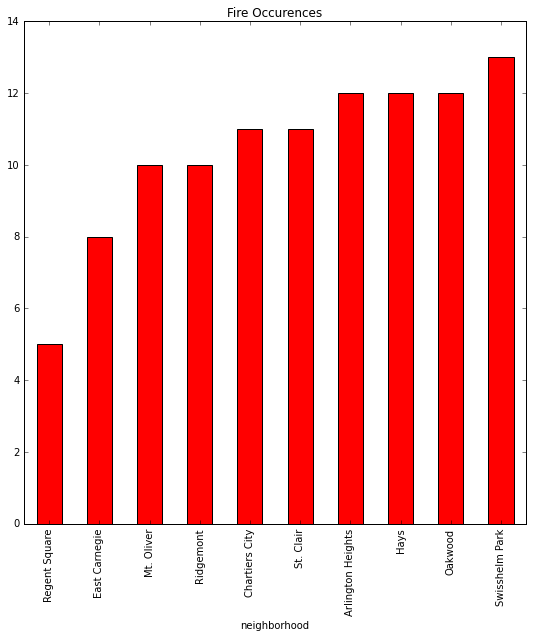

In [26]:
data_dropped.groupby('neighborhood').count().nsmallest(10, 'call_no', keep='all').plot.bar(y='call_no',title = 'Fire Occurences', color = 'red',  legend = False,  figsize = (9,9), rot=90, use_index=True)

I chose the fire incidents dataset because depending on how common fires are in a particular neighborhood, one could detrmine how safe or desirable the neighborhood is. The fire dataset includes data about the kind of fire it was, whereI organized the  fire incidents by the amount of occurrences for each particular neighboorhood. I found Regent Square, East Carnegie, Mt. Oliver, Ridgemont, and Chartiers City to be the top five Pittsburgh neighborhoods with the least amount of fires. 

# Metric: Arrests by Neighborhood
This data set contains information on people taken into custody by City of Pittsburgh police officers. The amount of crime occurrences which correlates to arrests in a neigborhood contirbutes to overall safety.

In [27]:
data3 = pd.read_csv("ArrestDataSet.csv", index_col="INCIDENTNEIGHBORHOOD", parse_dates=True)
del data3['PK']
del data3['AGE']
del data3['GENDER']
del data3['RACE']
del data3['ARRESTTIME']
del data3['INCIDENTZONE']
del data3['INCIDENTTRACT']
del data3['COUNCIL_DISTRICT']
del data3['PUBLIC_WORKS_DIVISION']
del data3['CCR']

data3.head(10)

,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,X,Y
INCIDENTNEIGHBORHOOD,,,,,
Bloomfield,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",-79.949277,40.452551
Outside City,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",-80.088018,40.440136
Westwood,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",-79.891803,40.486625
East Allegheny,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",-80.001939,40.454080
Crafton Heights,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",-80.052204,40.445900
Greenfield,"600 Block 1st AV Pittsburgh, PA 15219",3929 Retail Theft.,"800 Block Hazelwood AV Pittsburgh, PA 15217",-79.929238,40.419699
Brookline,"2300 Block Pioneer AV Pittsburgh, PA 15226",2701 Simple Assault.,"2300 Block Pioneer AV Pittsburgh, PA 15226",-80.020357,40.400037
Regent Square,"600 Block 1st AV Pittsburgh, PA 15219",2701 Simple Assault. / 5505 Public Drunkenness...,"700 Block S Braddock AV Pittsburgh, PA 15221",-79.834462,40.398957
East Liberty,"1400 Block Washington BL Pittsburgh, PA 15206",903 Criminal Conspiracy. / 3701 Robbery.,"N Euclid AV & Broad ST Pittsburgh, PA 15206",0.000000,0.000000


In [28]:
del data3['ARRESTLOCATION']
del data3['INCIDENTLOCATION']
del data3['X']
del data3['Y']
data_filtered = data3.dropna()

data3.groupby('INCIDENTNEIGHBORHOOD').count().nsmallest(15,'OFFENSES',keep='all')

,OFFENSES
INCIDENTNEIGHBORHOOD,
Mt. Oliver Neighborhood,2
Troy Hill-Herrs Island,6
Mt. Oliver Boro,16
Regent Square,22
Central Northside,23
Ridgemont,24
New Homestead,26
Swisshelm Park,27
Chartiers City,28


[]

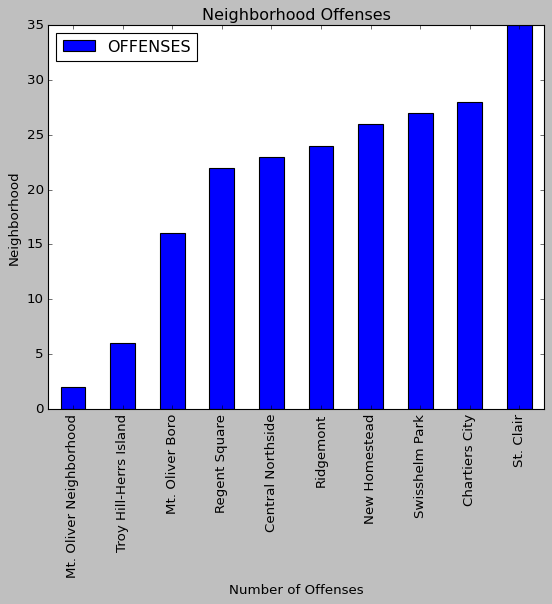

In [30]:
data3.groupby('INCIDENTNEIGHBORHOOD').count().nsmallest(10,'OFFENSES',keep='all').plot.bar(y="OFFENSES", rot= 90, use_index = True)

plt.title("Neighborhood Offenses")
plt.xlabel("Number of Offenses")
plt.ylabel("Neighborhood")
plt.style.use('classic')
my_colors = [(10.0, 20.0, 0.75)]
plt.plot(kind='bar', stacked=True, color=my_colors)

This Arrest dataset shows all the data regarding arrest reports from 2016-2020. It includes the offense, location, time, coordinates, incident zone, ID, and the profile of the perpetrator. That includes, age, gender, and race . I figured that the safest neighborhood would mean the best, which meant the neighborhood with the least amount of offenses would be the best neighborhood. So in order to display that, I first deleted columns which were unnecessary such as the ID of the report, X and Y coordinates, time, etc. I was able to narrow the data to just the neighborhood and the type of offenses. Next I used the count feature to group the neighborhood by the number of offenses per neighborhood. Finally, to sort through the dataset to find the neighborhood with the least amount of offenses, I used “nsmallest” for offenses so the data set could display the neighborhood with the least amount of offenses towards the top of the chart.